In [154]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import ssl
import warnings

In [38]:
sns.set_theme()
ssl._create_default_https_context = ssl._create_unverified_context
warnings.simplefilter("ignore")

# 3.2.8

In [39]:
# Задача: Сгенерируй на основе имеющихся фичей новую killer_feature, но не простую, а такую, по которой можно разделить классы однозначно.
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779914/make_it_easy.csv')

In [40]:
df.head()

,feature_1,feature_2,feature_3,label
0,2.5,0.00,58,B
1,2.5,0.02,61,B
2,2.5,0.05,33,B
3,2.5,0.07,89,B
4,2.5,0.10,58,B


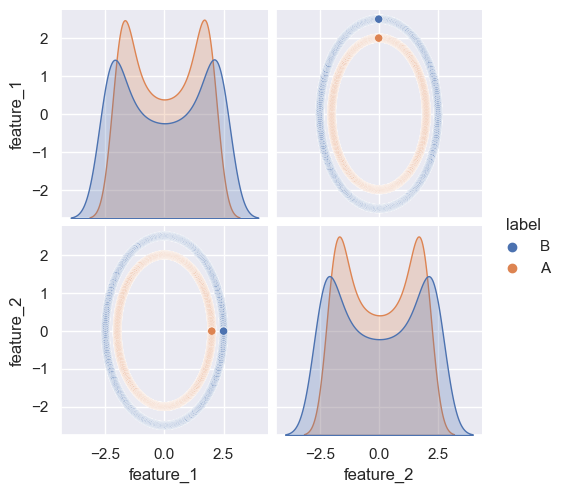

In [41]:
sns.pairplot(
    df,
    vars=['feature_1', 'feature_2'],
    # corner=True,
    hue="label",
);

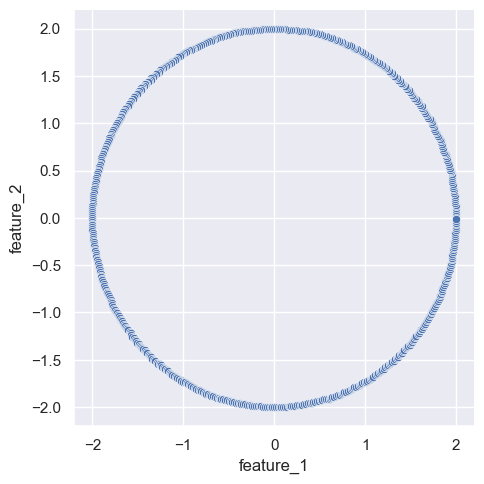

In [42]:
sns.relplot(
    data=df[df['label']=='A'],
    x="feature_1", y="feature_2"
)

In [43]:
# x^2 + y^2 = R^2
#R^2 = x^2 + y^2

In [44]:
df['killer_feature'] = (df['feature_1']**2 + df['feature_2']**2)
df

,feature_1,feature_2,feature_3,label,killer_feature
0,2.5,0.00,58,B,6.2500
1,2.5,0.02,61,B,6.2504
2,2.5,0.05,33,B,6.2525
3,2.5,0.07,89,B,6.2549
4,2.5,0.10,58,B,6.2600
...,...,...,...,...,...
1253,2.0,-0.09,30,A,4.0081
1254,2.0,-0.07,41,A,4.0049
1255,2.0,-0.05,30,A,4.0025
1256,2.0,-0.03,3,A,4.0009


KeyError: 'radius'

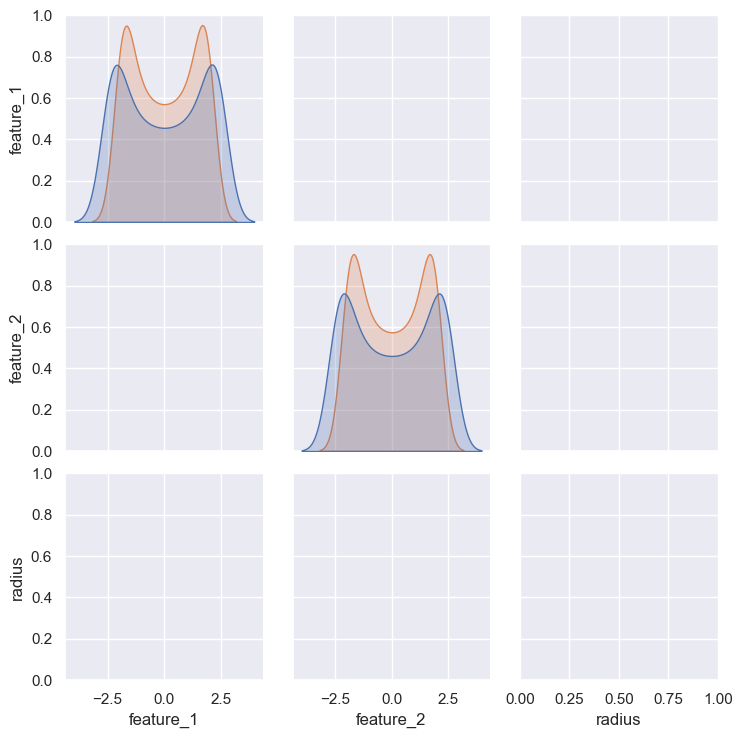

In [45]:
sns.pairplot(
    df,
    vars=['feature_1', 'feature_2', 'radius'],
    # corner=True,
    hue="label",
);

In [ ]:
df.groupby('label')['feature_2'].transform('std')

# 3.2.11

In [ ]:
# Задание: Вам дана выборка реальных сигналов, которые состоят из 128 точек и принадлежат двум классам.
# Если построить эти сигналы, то уже визуально понятно, что простая ML-модель не сможет различить их однозначно.
# Тем не менее, это вполне реально. Попробуйте придумать такие признаки и сделать прогноз так, чтобы ваша точность была 100%.
# В этой задаче не подразумевается использование сторонних библиотек, кроме numpy и pandas. Хватает всего двух фичей, чтобы разделить классы.

In [46]:
train = pd.read_csv('../data/03.2.11_fen_train.csv')
test = pd.read_csv('../data/03.2.11_fen_test.csv')
solution = pd.read_csv('../data/03.2.11_fen_sample_solution.csv')

In [47]:
train.sample(5)

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p120,p121,p122,p123,p124,p125,p126,p127,p128,label
137,254,-0.017898,-0.025201,-0.031772,-0.014877,0.001737,0.028726,0.028120,0.026434,0.079758,...,-0.131978,-0.127268,-0.096557,-0.071561,-0.075670,-0.059736,-0.055205,-0.051977,-0.044233,0
245,470,-0.263608,-0.239595,-0.198188,-0.188614,-0.157221,-0.112020,-0.109799,0.001449,0.122879,...,0.298885,0.304253,0.441400,0.651144,0.682074,0.283164,-0.229944,-0.329952,-0.263987,0
558,1060,0.045433,0.018323,-0.110922,-0.188863,-0.077790,0.055041,0.043209,-0.033597,-0.081323,...,0.091875,0.061301,0.120588,0.162225,0.205668,0.221164,0.166007,0.101981,-0.072675,0
33,63,0.932829,0.733595,0.186829,-0.229133,-0.516924,-0.570269,-0.388381,-0.387142,-0.319140,...,0.374568,0.323040,0.268564,0.232660,0.026866,-0.142809,-0.085374,-0.059307,-0.074758,0
608,1144,0.228720,0.252539,0.303810,0.261547,0.074053,-0.164559,-0.254579,-0.099422,0.039681,...,-0.113459,-0.055159,0.032000,0.048462,-0.040331,-0.167475,-0.241311,-0.234919,-0.171516,1


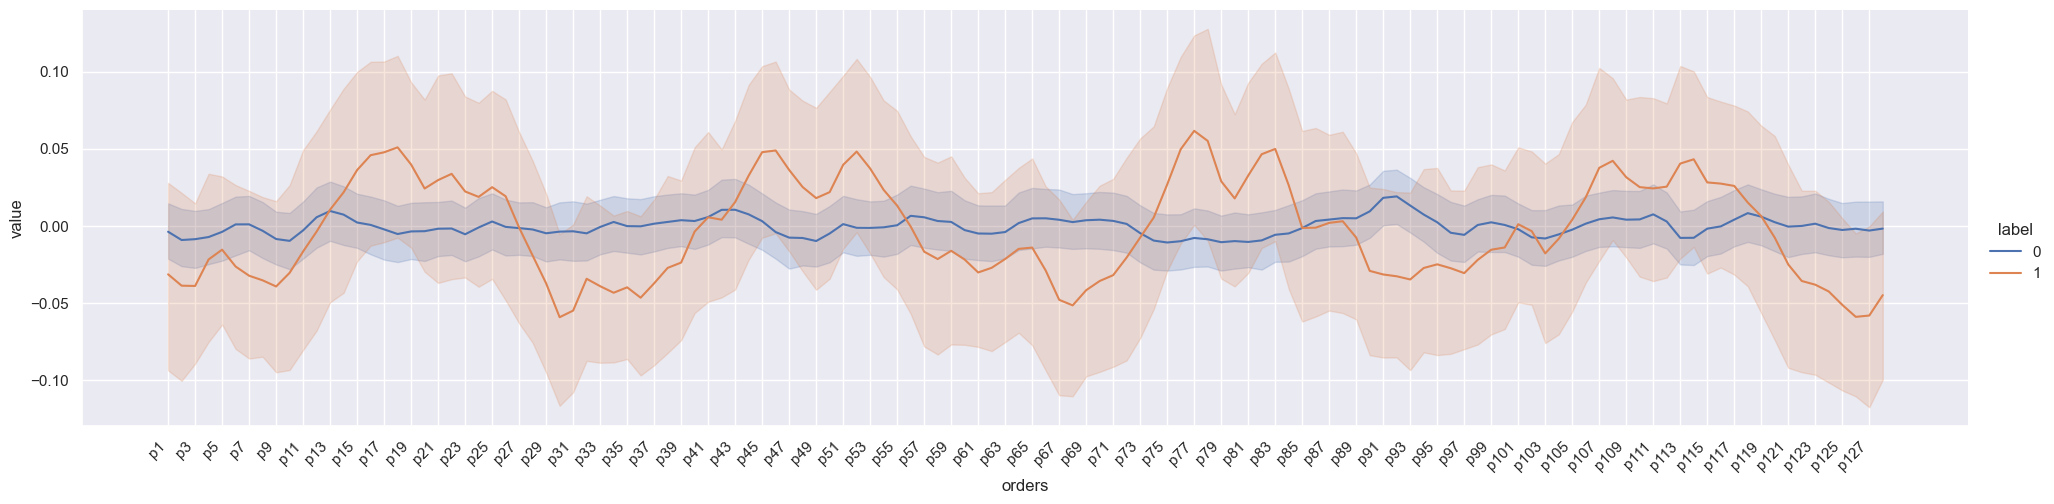

In [48]:
# Переводим датасет в long формат
train_melt = train.melt(
    id_vars="signal_id",
    value_vars=[f"p{i}" for i in range(1, 128 + 1)],
    var_name="orders",
    value_name="value",
).merge(train[["signal_id", "label"]], on="signal_id", how="left")

sns.relplot(
    data=train_melt, x="orders", y="value", hue="label", kind="line", aspect=4,
).set_xticklabels(rotation=45, horizontalalignment="right", step=2);

## Попытка #N

In [ ]:
# Алгоритм
#   - Подготовка
#       - Посчитать diff между точками каждого signal_id
#       - Посчитать var по каждому ряду signal_id и
#           - Посчитать статистики по var в каждом классе - это будут таргеты для классификации
#       - Заменить diff значения в каждом signal_id на |diff-значения|
#   - Поиск порога. Для каждого порога в диапазоне (start, end)
#       -

In [49]:
def prepare_data(data):
    data = data.copy()
    data_diff = data.iloc[:, 1:-1].diff(axis=1)
    data['var'] = data_diff.var(axis=1)

    var_stat = data.pivot_table(index='label', values='var', aggfunc=['mean', 'std', 'var'])
    label_1_min = var_stat.loc[1]['mean'] - var_stat.loc[1]['std']
    label_1_max = var_stat.loc[1]['mean'] + var_stat.loc[1]['std']

    data_diff_abs = np.abs(data_diff)
    result = data[['signal_id', 'label', 'var']]
    result = result.merge(data_diff_abs, left_index=True, right_index=True, how='left')
    return result, label_1_min[0], label_1_max[0], var_stat

In [50]:
train_prepare, label_1_min, label_1_max, var_stat = prepare_data(train)

In [51]:
var_stat

,mean,std,var
,var,var,var
label,,,
0,0.013072,0.006955,0.000048
1,0.009565,0.001060,0.000001


In [52]:
train_prepare['count_zerro'] = train_prepare.iloc[:, 4:].apply(lambda x: np.sum(x < 0.05), axis=1)

In [53]:
train_prepare.pivot_table(index='label', values='count_zerro', aggfunc=['min', 'max', 'mean', 'var', 'std'])

,min,max,mean,var,std
,count_zerro,count_zerro,count_zerro,count_zerro,count_zerro
label,,,,,
0,22,99,58.291874,204.452874,14.298702
1,45,55,51.176471,7.988235,2.826347


0.9556574923547401

In [55]:
# train_prepare['label_pred'] = train_prepare['var'].apply(lambda x: 1 if label_1_min <= x <= label_1_max else 0) # -> 0.8685015290519877
# train_prepare['label_pred'] = train_prepare['var'].apply(lambda x: 1 if x <= 0.000001 else 0) # -> 0.9220183486238532
train_prepare['label_pred'] = np.where((train_prepare['var'] < 0.009565) & (train_prepare['count_zerro'] < 56), 1, 0) # -> 0.9525993883792049

accuracy_score(train_prepare['label'], train_prepare['label_pred'])

In [56]:
def predict(data):
    data = data.copy()
    data_diff = data.iloc[:, 1:].diff(axis=1)
    data['var'] = data_diff.var(axis=1)
    data_diff_abs = np.abs(data_diff)
    result = data[['signal_id', 'var']]
    result = result.merge(data_diff_abs, left_index=True, right_index=True, how='left')
    return result


,signal_id,var,p1,p2,p3,p4,p5,p6,p7,p8,...,p119,p120,p121,p122,p123,p124,p125,p126,p127,p128
412,1164,0.031119,NaN,0.096974,0.025208,0.025919,0.131016,0.004280,0.053727,0.103162,...,0.150459,0.330751,0.129547,0.180739,0.235871,0.123717,0.216029,0.363267,0.168185,0.069402
253,735,0.016453,NaN,0.006211,0.001000,0.006443,0.081513,0.120959,0.054332,0.020869,...,0.059073,0.036957,0.064066,0.056242,0.062357,0.036228,0.106759,0.032249,0.029323,0.090810
199,565,0.010137,NaN,0.035293,0.060696,0.047175,0.154044,0.136251,0.008666,0.074850,...,0.109468,0.133839,0.101643,0.085405,0.063591,0.010381,0.028213,0.013625,0.093400,0.194399
341,978,0.014534,NaN,0.164227,0.147114,0.108470,0.180726,0.154004,0.038819,0.055753,...,0.020169,0.281830,0.140882,0.019857,0.012417,0.148092,0.082307,0.030544,0.039528,0.121999
180,503,0.004225,NaN,0.043437,0.035771,0.041372,0.160972,0.119687,0.047549,0.059201,...,0.076694,0.099769,0.067889,0.035163,0.001942,0.005597,0.025615,0.074356,0.060096,0.034978


In [57]:
test_prepare = predict(test)
test_prepare.sample(5)

In [58]:
test_prepare['count_zerro'] = test_prepare.iloc[:, 3:].apply(lambda x: np.sum(x < 0.05), axis=1)

In [59]:
test_prepare['label'] = np.where((test_prepare['var'] < 0.009565) & (test_prepare['count_zerro'] < 56), 1, 0)

In [ ]:
test_prepare[['signal_id', 'label']].to_csv('../submissions/03.2.11_v2.csv', index=False)

## Поиск идеальных параметров :)

In [67]:
# Алгоритм
#   - Подготовка
#       - Посчитать diff между точками каждого signal_id
#       - Посчитать var по каждому ряду signal_id и
#       - Посчитать описательные статистики по var в каждом классе
#       - Заменить diff значения в каждом signal_id на |diff-значения| и посчитать описательные статистики в каждом классе
#   - Поиск идеальных параметров. Прогнать все варианты получившихся описательных статистик. Задача - получить 1 в accuracy_score

In [68]:
def prepare_train(data):
    data = data.copy()
    data_diff = data.iloc[:, 1:-1].diff(axis=1)
    data['var'] = data_diff.var(axis=1)

    var_stat = data.groupby('label', as_index=False).agg(
        min=('var','min'),
        max=('var', 'max'),
        interval=('var', lambda x: max(x) - min(x)),
        mean=('var', 'mean'),
        median=('var', 'median'),
        var=('var', 'var'),
        std=('var', 'std'),
        q_05=('var', lambda x: pd.Series(x).quantile(0.05)),
        q_95=('var', lambda x: pd.Series(x).quantile(0.95)),
    )

    data = data[['signal_id', 'label','var']].merge(data_diff, left_index=True, right_index=True, how='left')
    return data, var_stat

In [69]:
train_prepare, var_stat = prepare_train(train)

,signal_id,label,var,p2,p3,p4,p5,p6,p7,p8,...,p119,p120,p121,p122,p123,p124,p125,p126,p127,p128
0,3,0,0.010646,0.095915,0.014257,0.003305,0.000568,0.006560,0.021956,0.009471,...,0.014582,0.043924,0.008939,0.045588,0.023098,0.000286,0.060518,0.038280,0.019195,0.028469
1,4,0,0.020320,0.000396,0.106874,0.141983,0.079999,0.010292,0.048037,0.165602,...,0.108139,0.117949,0.026038,0.185170,0.261072,0.198996,0.152492,0.412280,0.216810,0.060114
2,5,0,0.010246,0.025927,0.059926,0.006231,0.072817,0.009319,0.016236,0.028300,...,0.118666,0.037074,0.005695,0.009232,0.033325,0.048677,0.055678,0.073347,0.042792,0.029707
3,6,0,0.013071,0.101988,0.044979,0.178558,0.169415,0.036736,0.071321,0.154706,...,0.092715,0.079074,0.099374,0.126577,0.021606,0.109596,0.018487,0.020248,0.015300,0.116341
4,7,0,0.008025,0.248632,0.222584,0.091281,0.052052,0.081312,0.051596,0.064000,...,0.077074,0.053232,0.049471,0.089587,0.037947,0.011400,0.039515,0.028411,0.012739,0.004338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,1214,0,0.020489,0.242416,0.367176,0.102147,0.357012,0.561063,0.105472,0.352171,...,0.025368,0.053338,0.052037,0.020477,0.026803,0.020122,0.112407,0.068539,0.037610,0.086233
650,1218,0,0.003109,0.004772,0.063951,0.078939,0.039013,0.018582,0.040251,0.041221,...,0.021479,0.044730,0.006244,0.018732,0.030317,0.007767,0.014111,0.037688,0.005066,0.005525
651,1219,0,0.009395,0.018975,0.041317,0.013152,0.056938,0.002642,0.024334,0.053551,...,0.035072,0.030624,0.033133,0.032131,0.021536,0.059767,0.003399,0.056614,0.064026,0.037128
652,1221,0,0.020126,0.020262,0.125415,0.085739,0.061345,0.069014,0.176297,0.236122,...,0.079944,0.057768,0.005632,0.009402,0.021844,0.067228,0.083463,0.053190,0.089199,0.341739


In [70]:
threshold_zero_diff = 0.05
train_prepare['zero_diff_count'] = np.sum(np.abs(train_prepare.iloc[:, 1:-2]) < threshold_zero_diff, axis=1)
sns.scatterplot(data=train_prepare, x='var', y='zero_diff_count', hue='label');

In [188]:
params =[
    [_ for _ in np.arange(0.040, 0.056, 0.001)], # threshold
    [_ for _ in np.arange(0.005, 0.015, 0.001)], # var
    [_ for _ in np.arange(40, 60, 0.5)] # zero_dif
]

params = list(itertools.product(*params))

  0%|          | 0/6400 [00:00<?, ?it/s]

In [189]:
def train_predict(data):
    data['test'] = '1'
    return data
    # for i in params[:3]:


        # print(i)

,trheshold,var,zero_dif,accurency
4317,0.050,0.012,58.5,1.000000
4315,0.050,0.012,57.5,1.000000
3913,0.049,0.012,56.5,1.000000
4316,0.050,0.012,58.0,1.000000
3513,0.048,0.012,56.5,1.000000
...,...,...,...,...
396,0.040,0.014,58.0,0.688073
799,0.041,0.014,59.5,0.669725
397,0.040,0.014,58.5,0.669725
398,0.040,0.014,59.0,0.669725


In [158]:
train

,trheshold,var,zero_dif,accurency
4317,0.050,0.012,58.5,1.000000
4315,0.050,0.012,57.5,1.000000
3913,0.049,0.012,56.5,1.000000
4316,0.050,0.012,58.0,1.000000
3513,0.048,0.012,56.5,1.000000
...,...,...,...,...
396,0.040,0.014,58.0,0.688073
799,0.041,0.014,59.5,0.669725
397,0.040,0.014,58.5,0.669725
398,0.040,0.014,59.0,0.669725


In [186]:
train_predict(train)

In [187]:
train